### Data Scientists Salary Case Study 
The data used comes from Kaggle: https://www.kaggle.com/kaggle/kaggle-survey-2017

In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("multipleChoiceResponses.csv", encoding="ISO-8859-1")
chang_rate = pd.read_csv("conversionRates.csv", encoding="ISO-8859-1")


/var/folders/kk/3lqkkjzx7kb59yj16vgzwnyh0000gn/T/ipykernel_21318/1761797495.py:1: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("multipleChoiceResponses.csv", encoding="ISO-8859-1")


Filter useful columns

In [4]:
data_merged = pd.merge(data, chang_rate, how='left',
                       left_on='CompensationCurrency', right_on='originCountry')
data_usefull = data_merged[['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'CodeWriter',
                            'CurrentJobTitleSelect', 'CurrentEmployerType', 'LanguageRecommendationSelect',
                            'FormalEducation', 'CompensationAmount', 'CompensationCurrency', 'exchangeRate']]


The following cell look for 
1. employees with non-null country and compensation amount
2. their countries have valid exchange rate to USD 
3. full-time
4. All different referrence name of China is replaced to China for further analysis

In [5]:
# select full-time employees
data_selected = data_usefull[data_usefull['EmploymentStatus']
                             == 'Employed full-time']

# drop null values
data_selected = data_selected.dropna(axis=0, how='any', subset=[
                                     'Country', 'CompensationAmount', 'exchangeRate'])

# replace , to convert it to numbers
data_selected['CompensationAmount'] = data_selected['CompensationAmount'].apply(
    lambda x: x.replace(',', ''))

# drop -
data_selected.drop(
    data_selected[data_selected['CompensationAmount'] == '-'].index, inplace=True)

# convert to USD
data_selected['CompensationAmountExanged'] = data_selected.apply(
    lambda x: float(x['CompensationAmount'])*float(x['exchangeRate']),  axis=1)

data_selected.replace({"People's Republic of China": "China",
                      "Republic of China": "China", "Taiwan": "China"}, inplace=True)


Save in selected data frame into CSV

In [6]:
data_selected.to_csv("full_time_salary_in_USD.csv")


Take a glimpse of selected data

In [7]:
data_selected.head(10)


,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,CurrentEmployerType,LanguageRecommendationSelect,FormalEducation,CompensationAmount,CompensationCurrency,exchangeRate,CompensationAmountExanged
8,Female,Australia,43.0,Employed full-time,Yes,Business Analyst,Employed by non-profit or NGO,Python,Bachelor's degree,80000,AUD,0.802310,64184.800
9,Male,Russia,33.0,Employed full-time,Yes,Software Developer/Software Engineer,Employed by a company that doesn't perform adv...,Python,Bachelor's degree,1200000,RUB,0.017402,20882.400
11,Male,India,27.0,Employed full-time,Yes,Data Scientist,Employed by professional services/consulting f...,Python,Bachelor's degree,95000,INR,0.015620,1483.900
14,Male,China,26.0,Employed full-time,Yes,Software Developer/Software Engineer,Employed by professional services/consulting firm,Python,Master's degree,1100000,TWD,0.033304,36634.400
22,Male,United States,33.0,Employed full-time,Yes,Scientist/Researcher,Employed by professional services/consulting firm,Matlab,Doctoral degree,100000,USD,1.000000,100000.000
25,Male,Russia,22.0,Employed full-time,Yes,Data Analyst,Employed by professional services/consulting f...,Python,Bachelor's degree,624000,RUB,0.017402,10858.848
27,Male,Colombia,34.0,Employed full-time,Yes,Data Scientist,Employed by a company that doesn't perform adv...,Python,Master's degree,156000000,COP,0.000342,53352.000
31,Male,Poland,29.0,Employed full-time,Yes,Software Developer/Software Engineer,Employed by company that makes advanced analyt...,Python,Master's degree,126000,PLN,0.281104,35419.104
32,Male,United Kingdom,36.0,Employed full-time,Yes,Data Scientist,Employed by a company that performs advanced a...,Python,Doctoral degree,130000,GBP,1.324188,172144.440
34,Male,United States,35.0,Employed full-time,Yes,Engineer,Employed by a company that performs advanced a...,Python,Doctoral degree,133000,USD,1.000000,133000.000


In [8]:
# print basic information of the table
# shape[0] is column and shape[1] is rows
print('The total number of respondents:', data_selected.shape[0])
print('Total number of Countries with respondents:',
      data_selected['Country'].nunique())

# value_count: 计算当前column中每一个值出现了几次，index[i]为排在i位的column值，value[i]为在i位的出现次数
print('Country with highest respondents:', data_selected['Country'].value_counts(
).index[0], 'with', data_selected['Country'].value_counts().values[0], 'respondents')

print('Youngest respondent:', data_selected['Age'].min(
), 'and Oldest respondent:', data_selected['Age'].max())


The total number of respondents: 3774
Total number of Countries with respondents: 51
Country with highest respondents: United States with 1098 respondents
Youngest respondent: 0.0 and Oldest respondent: 100.0


#### Plot about DataSet

In [9]:
import plotly.figure_factory as fig_fact
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.offline as py
from plotly.subplots import make_subplots  # For creating subplots

# Initialize Plotly in notebook mode
plotly.offline.init_notebook_mode(connected=True)

##### Gender and Education Distribution

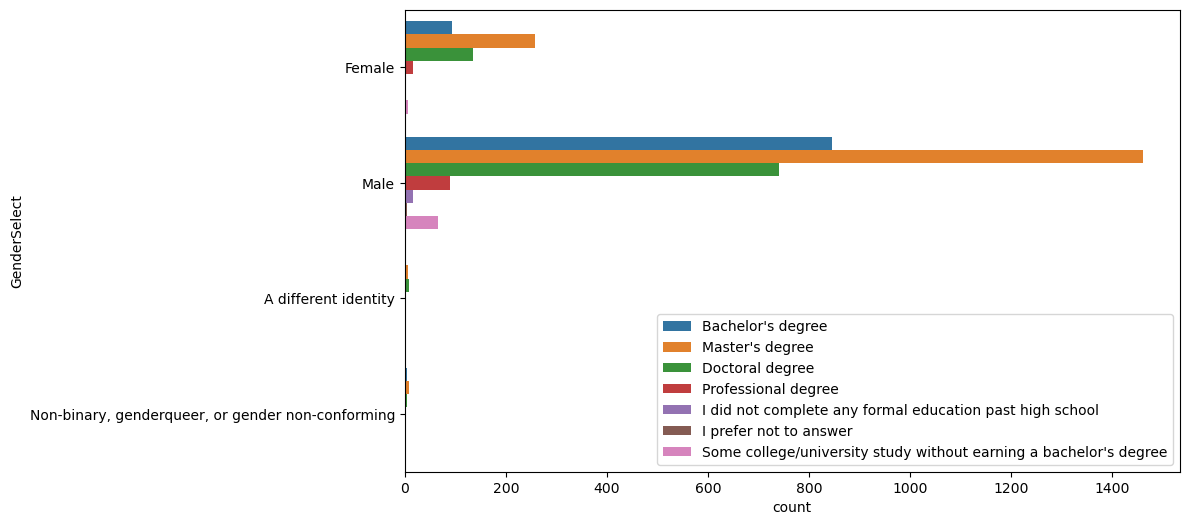

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y='GenderSelect', data=data_selected, hue='FormalEducation')
plt.legend(loc='lower right')
plt.show()


##### Country

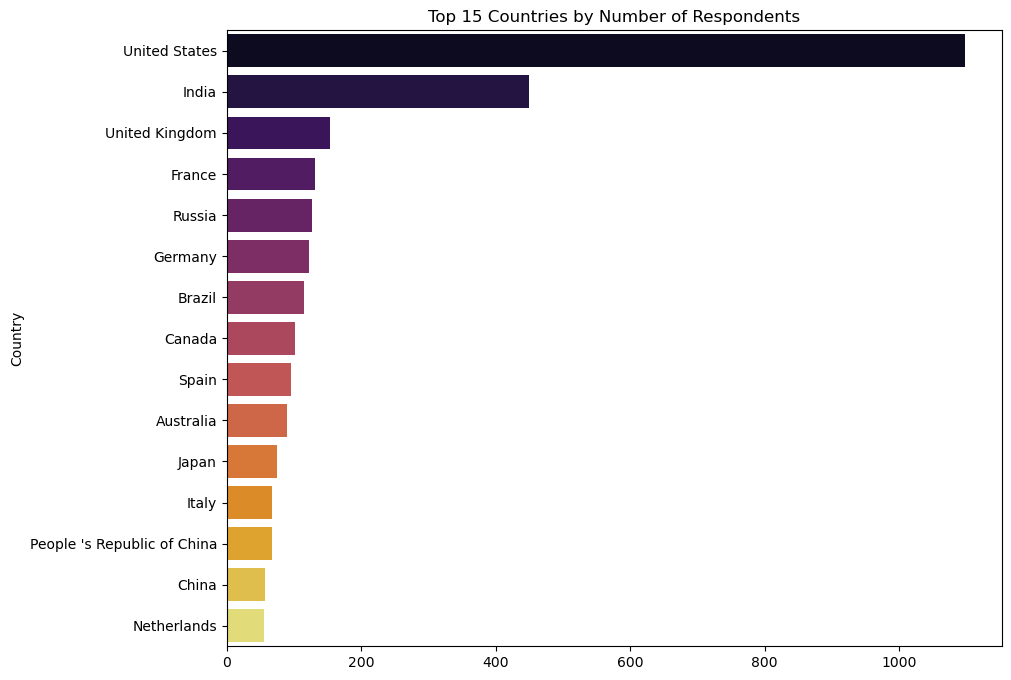

,Country,count
0,United States,1098
1,India,450
2,United Kingdom,153
3,France,131
4,Russia,127
5,Germany,122
6,Brazil,115
7,Canada,102
8,Spain,95
9,Australia,90


In [11]:
data_country = data_selected.drop(data_selected[data_selected['Country'] == 'Other'].index)[
    'Country'].value_counts().to_frame().reset_index()

sns.barplot(y=data_country['Country'][:15], x=data_country['count'][:15],palette='inferno')
plt.title('Top 15 Countries by Number of Respondents')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

data_country[:15]


Respondents Distribution in World Map

In [12]:
data = [dict(
    type='choropleth',
    locations=data_country['Country'],
    z=data_country['count'],
    locationmode='country names',
    text=data_country['Country'],
    colorscale='Viridis',  # Choose an appropriate colorscale
    reversescale=True,
    colorbar=dict(
        title='Survey Respondents',
        tickprefix='',
    ),
)]

layout = dict(
    title='Survey Respondents by Nationality',
    geo=dict(
        showframe=False,
        showcoastlines=True,  # Set to True to display coastlines
        projection=dict(
            type='mercator',
        ),
    ),
    height=618,
    width=1000
)

fig = go.Figure(data=data, layout=layout)

# Use plotly.offline to plot the figure in Jupyter Notebook
py.iplot(fig, validate=False)

##### Plot Age Distribution

In [16]:
fig = fig_fact.create_distplot([data_selected[data_selected['Age'] > 0]['Age']], ['age'], colors=['#BA68C8'])
py.iplot(fig, filename='Age Distribution')

### Salary Distribution

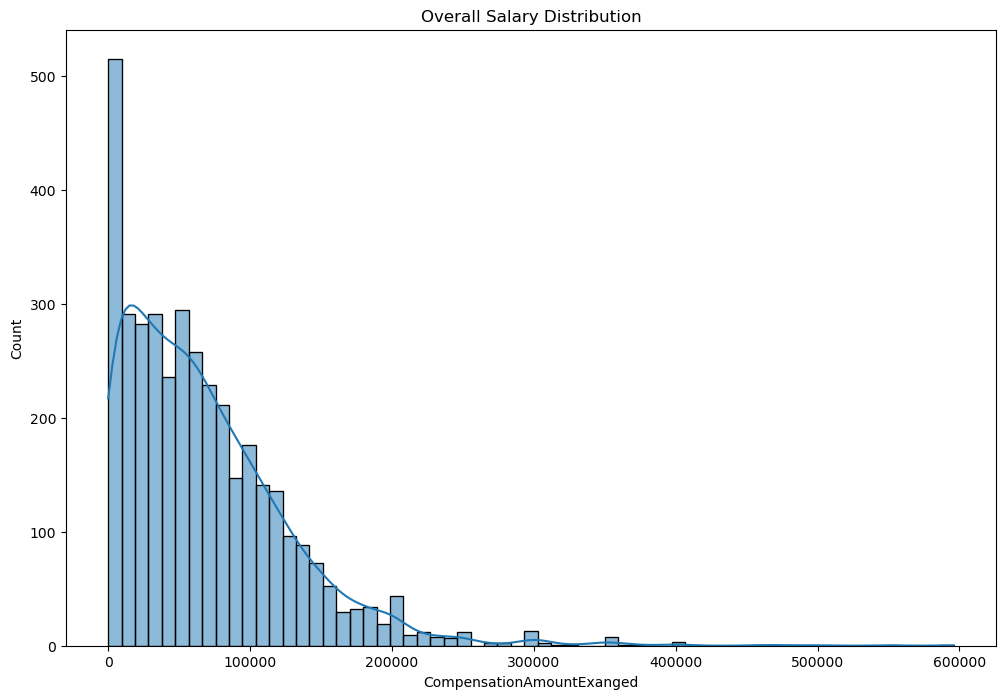

In [14]:
plt.subplots(figsize=(12, 8))
# select proper salary
data_salary = data_selected[data_selected['CompensationAmountExanged'] < 1000000]

# kde is kernel density estimation
sns.histplot(data_salary['CompensationAmountExanged'], kde=True)

plt.title('Overall Salary Distribution')
plt.show()

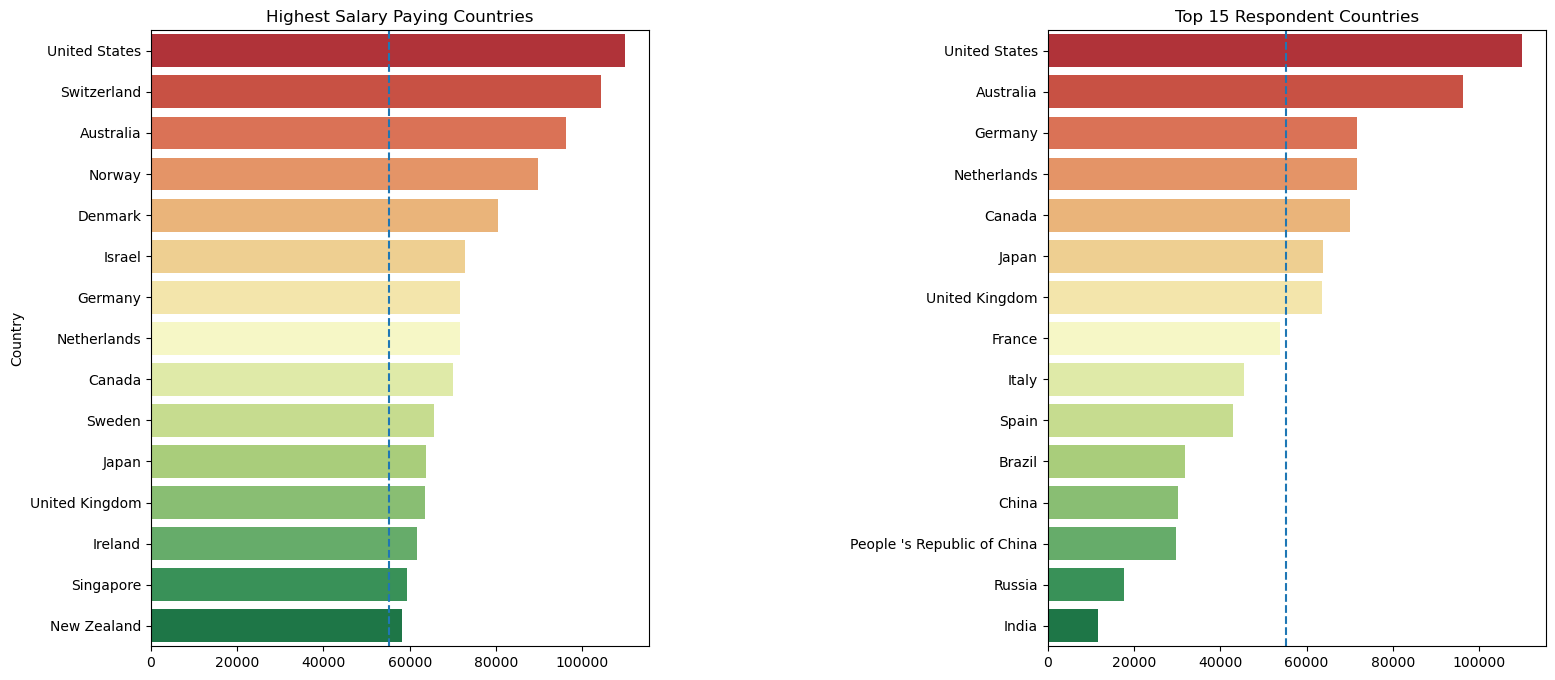

In [17]:
# Create a figure with two subplots side by side
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Group data_salary by 'Country' and calculate the median of 'CompensationAmountExchanged'
sal_coun = data_salary.groupby('Country')['CompensationAmountExanged'].median(
).sort_values(ascending=False)[:15].to_frame()

# Create a barplot for the highest salary paying countries
sns.barplot(x='CompensationAmountExanged', y=sal_coun.index,
            data=sal_coun, palette='RdYlGn', ax=ax[0])

# Add a vertical dashed line at the median compensation amount
ax[0].axvline(data_salary['CompensationAmountExanged'].median(),
              linestyle='dashed')

# Set the title and labels
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')

# Get the top 15 respondent countries from data_country
resp_coun = data_country[:15]

# Group data_salary by 'Country' and calculate the median of 'CompensationAmountExanged'
max_coun = data_salary.groupby(
    'Country')['CompensationAmountExanged'].median().to_frame()

# Filter max_coun to include only countries in resp_coun
max_coun = max_coun[max_coun.index.isin(resp_coun['Country'])]

# Sort and create a horizontal bar plot for the compensation of top 15 respondent countries
max_coun = max_coun.sort_values(by='CompensationAmountExanged', ascending=False)

# Graph top 15 countries in compensation
sns.barplot(width=0.8, ax=ax[1], y=max_coun.index,
            x='CompensationAmountExanged', data=max_coun, palette='RdYlGn')

# Add a vertical dashed line at the median compensation amount
ax[1].axvline(data_salary['CompensationAmountExanged'].median(),
              linestyle='dashed')

# Set the title and labels
ax[1].set_title('Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.8)

# Show the plots
plt.show()


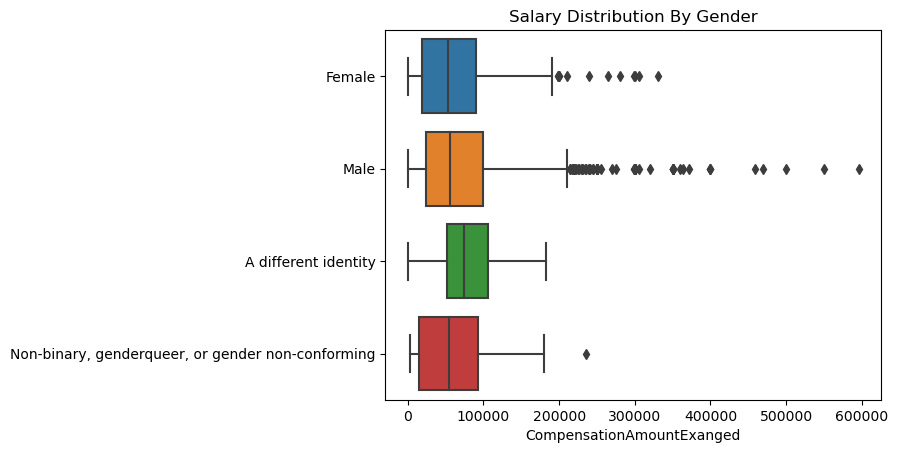

In [37]:
# Group data_salary by 'gender' and plot distribution 'CompensationAmountExanged'
# we use data_salary to avoid outliers
sns.boxplot(data=data_salary, x='CompensationAmountExanged', y='GenderSelect')
plt.ylabel('')
plt.title('Salary Distribution By Gender')
plt.show()


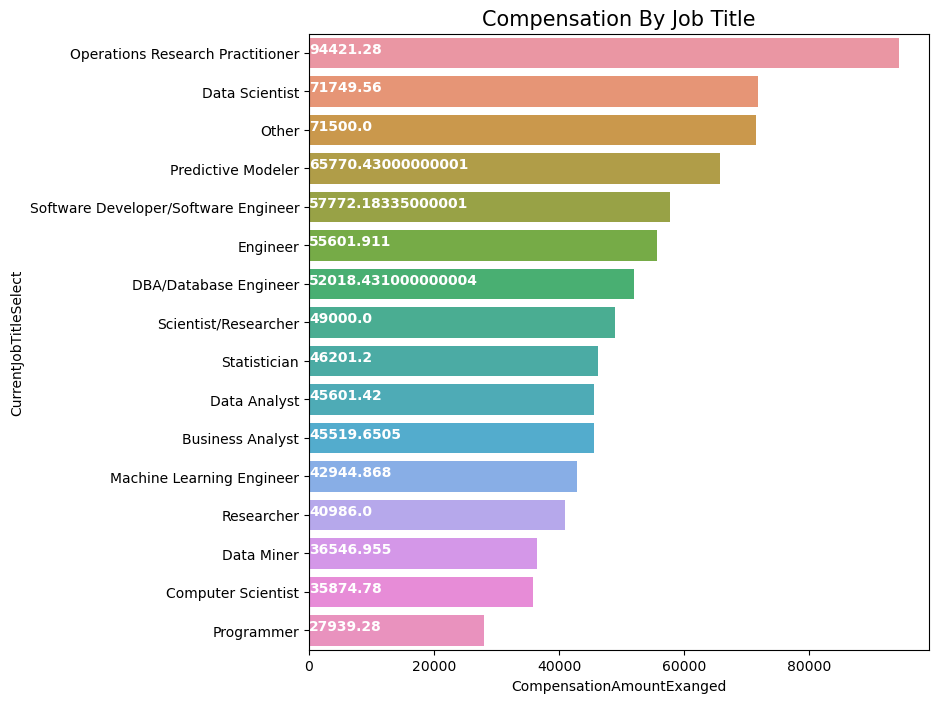

In [49]:
# group salary by job title
salary_job = data_salary.groupby('CurrentJobTitleSelect')['CompensationAmountExanged'].median().to_frame()
salary_job.sort_values(by='CompensationAmountExanged', ascending=False, inplace=True)
plt.figure(figsize=(8,8))
ax = sns.barplot(data=salary_job, x='CompensationAmountExanged', y=salary_job.index)
plt.title('Compensation By Job Title',size=15)
for idx, val in enumerate(salary_job.CompensationAmountExanged):
    ax.text(.5, idx, val, fontsize=10, color='white', weight='bold')
plt.show()

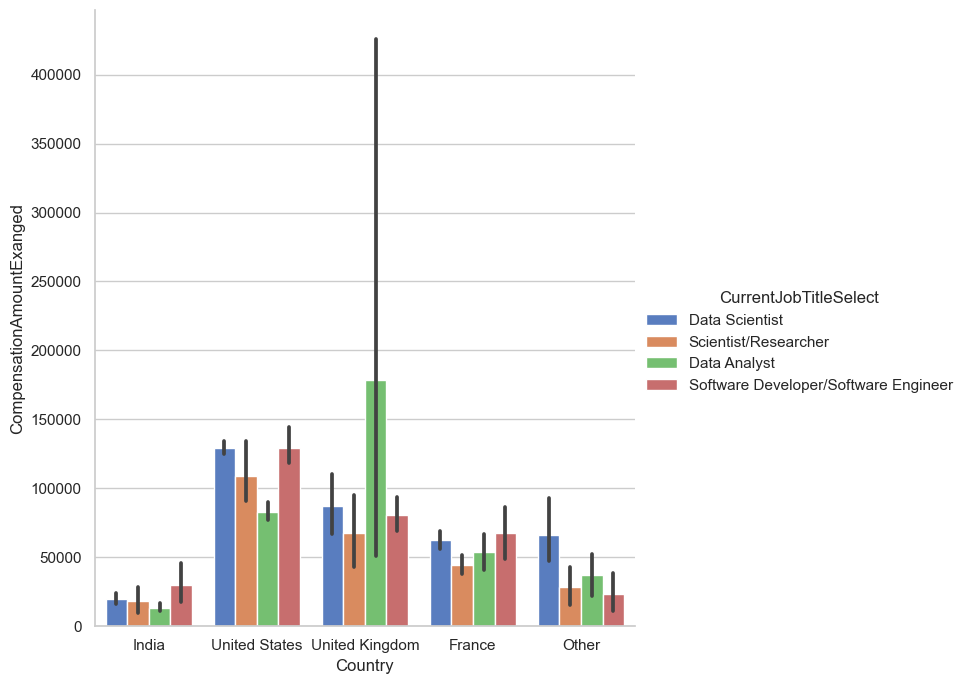

In [82]:
# Compensation of top 5 country in top 4 common jobs in DS
data_plot = data_selected[data_selected['Country'].isin(
    data_selected['Country'].value_counts()[:5].index.to_list())]

data_plot = data_plot[data_plot['CurrentJobTitleSelect'].isin(
    data_plot['CurrentJobTitleSelect'].value_counts().index[:4].tolist())]

sns.set(style='whitegrid')
g = sns.catplot(x="Country", y="CompensationAmountExanged", hue="CurrentJobTitleSelect", data=data_plot
                , kind='bar', height=7, aspect=1, palette="muted")

plt.show()

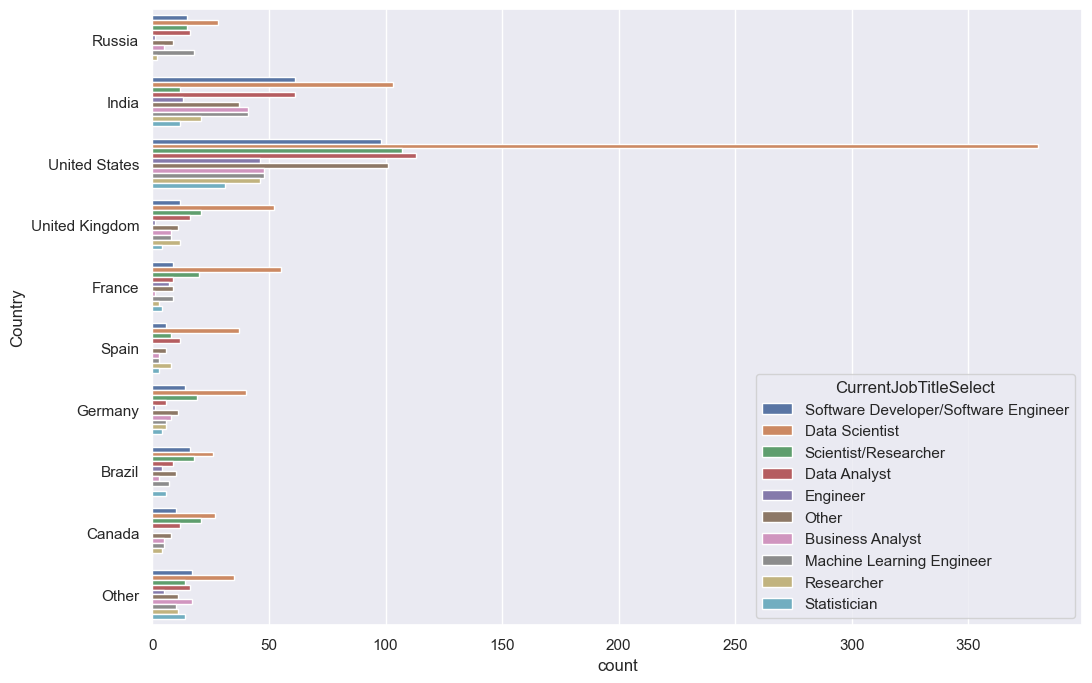

In [84]:


data_plot = data_plot = data_selected[data_selected['Country'].isin(
    data_selected['Country'].value_counts()[:10].index.to_list())]

data_plot = data_plot[data_plot['CurrentJobTitleSelect'].isin(
    data_plot['CurrentJobTitleSelect'].value_counts().index[:10].tolist())]

fig = plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.countplot(y='Country', hue='CurrentJobTitleSelect', data=data_plot)
plt.show()

##### Circle Graph with top 10 countries and top 10 jobs

/var/folders/kk/3lqkkjzx7kb59yj16vgzwnyh0000gn/T/ipykernel_21318/3408630631.py:13: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



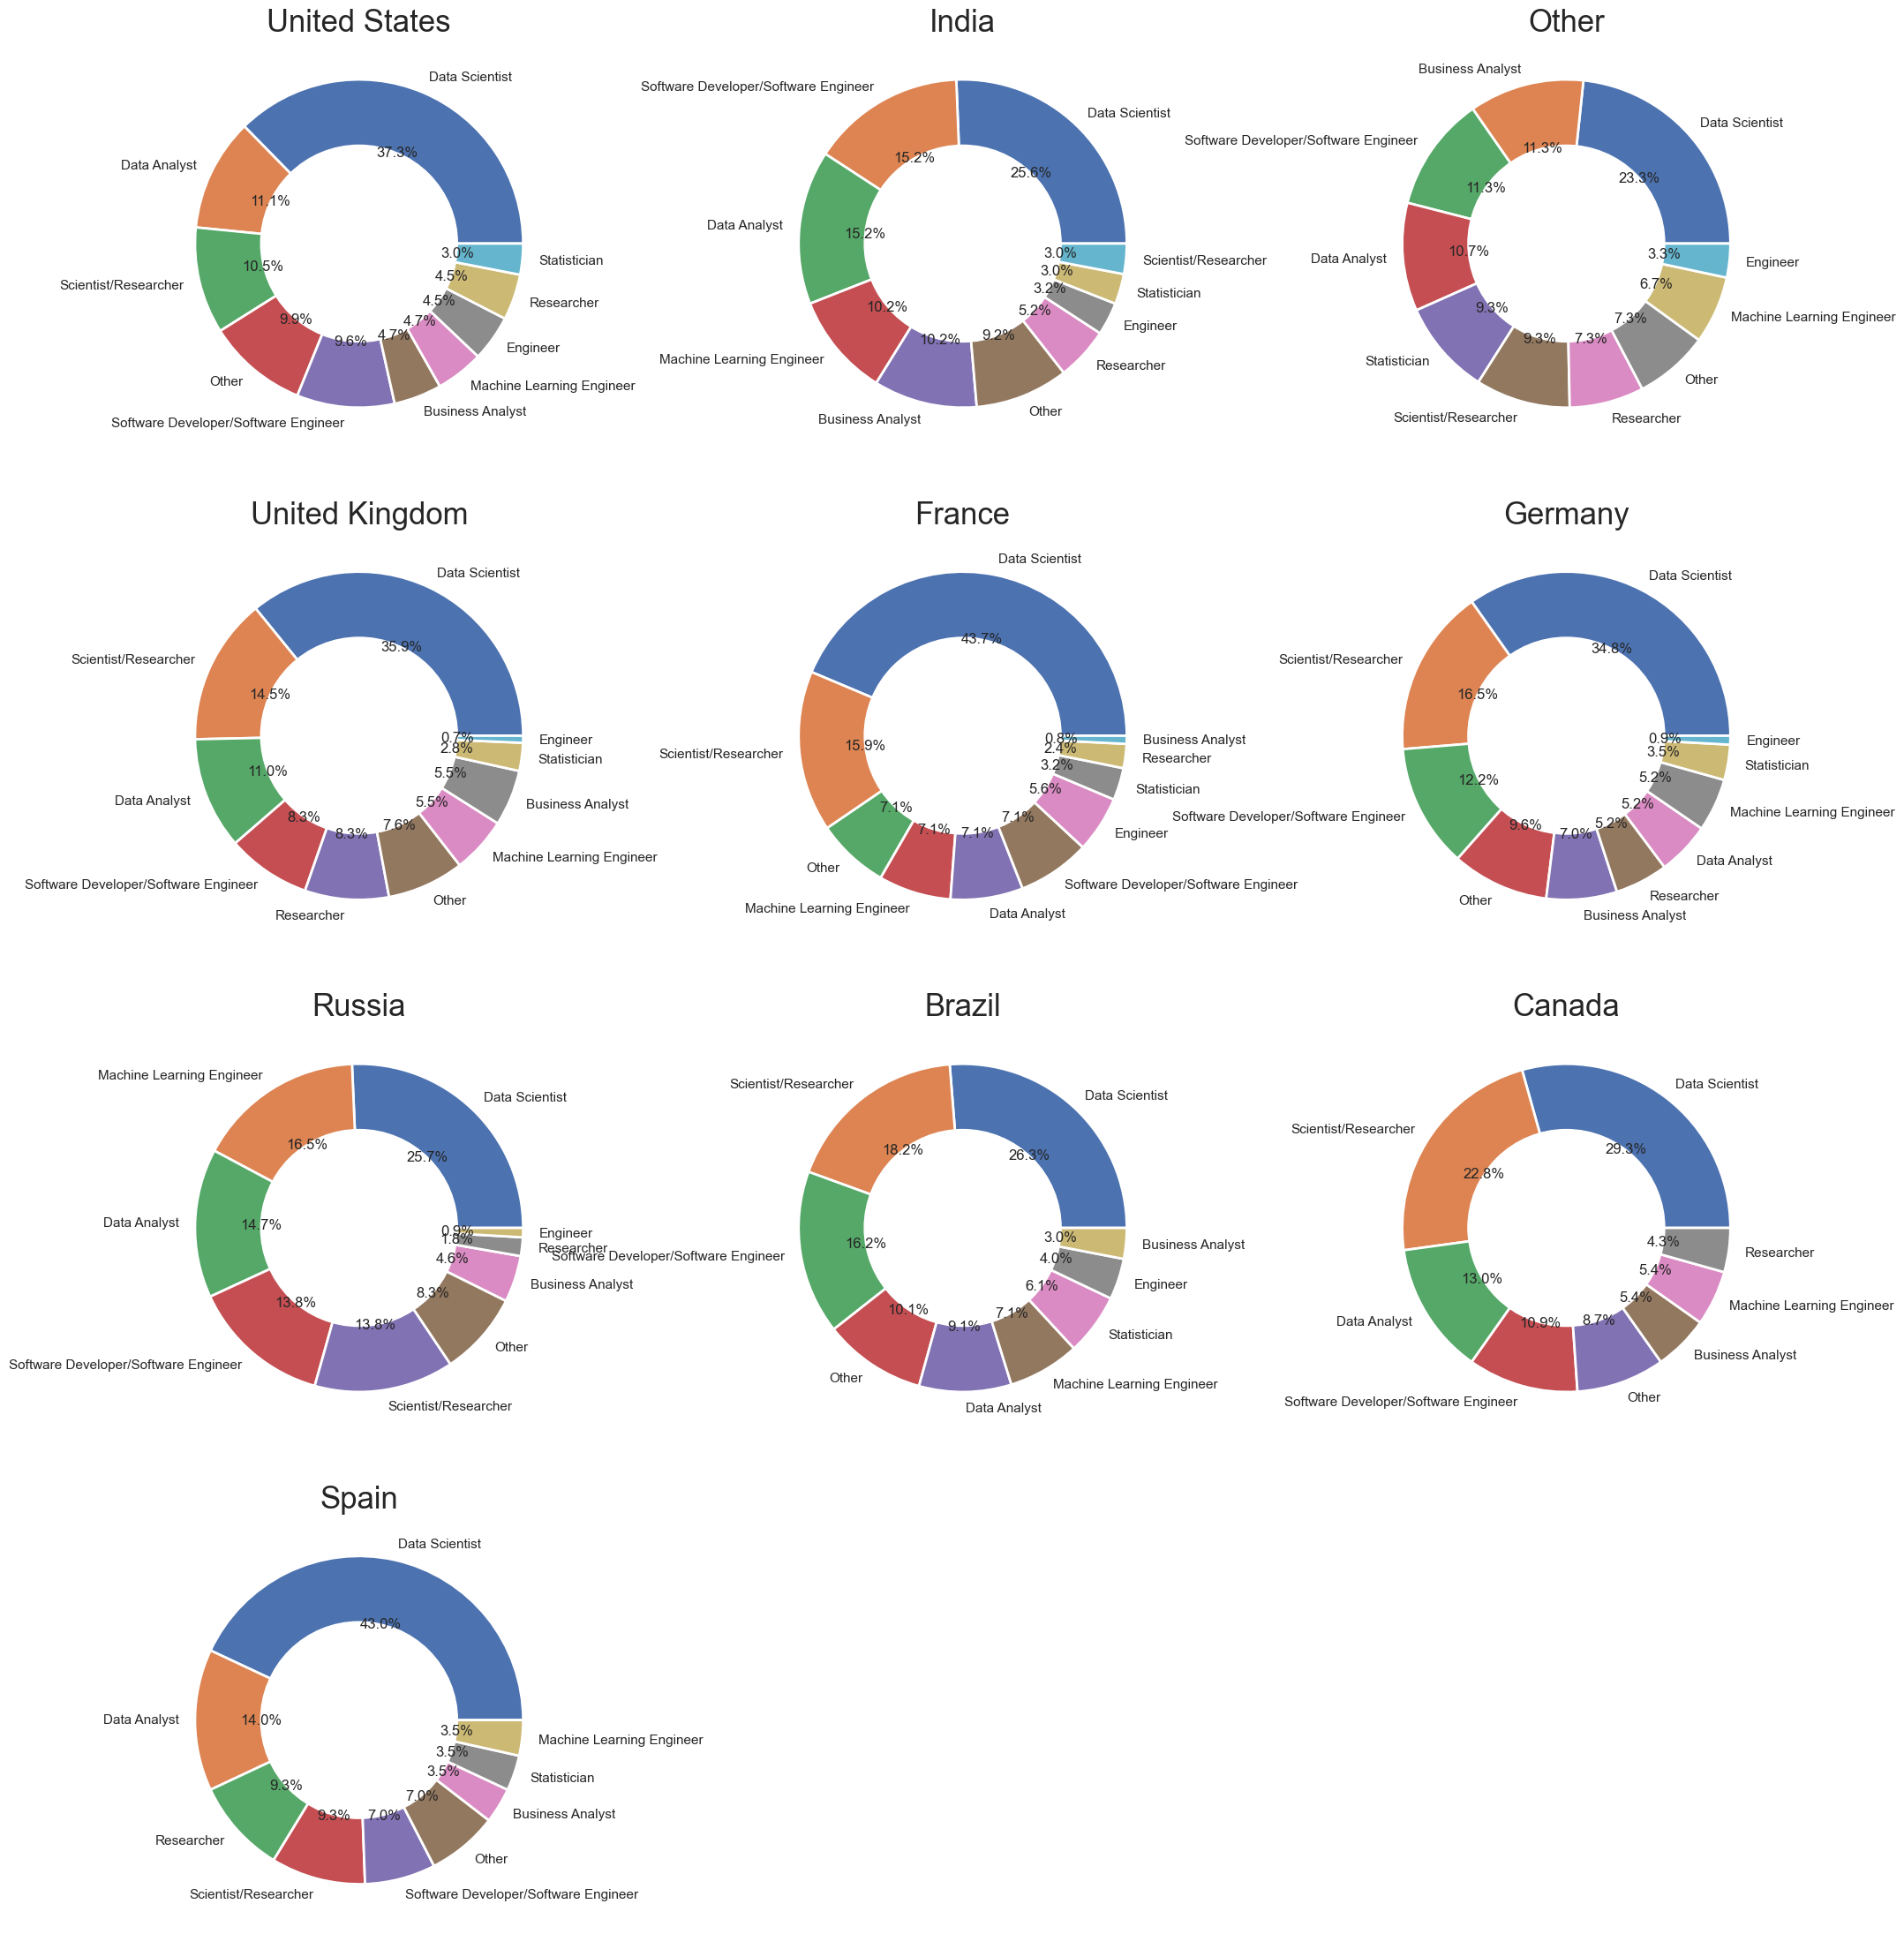

In [97]:
import itertools

data_plot = data_selected[data_selected['Country'].isin(
    data_selected['Country'].value_counts().index[0:10].tolist())]
data_plot = data_plot[data_plot['CurrentJobTitleSelect'].isin(
    data_plot['CurrentJobTitleSelect'].value_counts().index[0:10].tolist())]
plt.subplots(figsize=(25, 35))

countries = data_plot['Country'].value_counts().index.to_list()
length = len(data_plot['Country'].value_counts())

for i, j in itertools.zip_longest(countries, range(length)):
    plt.subplot((length // 2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    data_plot[data_plot['Country'] == i]['CurrentJobTitleSelect'].value_counts(
    ).plot.pie(autopct='%1.1f%%', wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

    plt.title(i, size=25)
    my_circle = plt.Circle((0, 0), 0.6, color='white')
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.xlabel('')
    plt.ylabel('')
plt.show()
